In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# !pip install pandas

In [220]:
dados_2023 = pd.read_excel('../data/OcorrenciaMensal(Criminal)-EstadoSP_20240519_142945.xlsx', sheet_name='2023', dtype=str)
dados_2024 = pd.read_excel('../data/OcorrenciaMensal(Criminal)-EstadoSP_20240519_142945.xlsx', sheet_name='2024', dtype=str)

/home/luma/anaconda3/envs/prob/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

/home/luma/anaconda3/envs/prob/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [233]:
dados_2023['Ano'] = 2023
dados_2024['Ano'] = 2024

dados=pd.concat([dados_2024, dados_2023], ignore_index=True).replace('...', 0)

dados[dados['Natureza']=='TOTAL DE ESTUPRO (4)']

,Natureza,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano
13,TOTAL DE ESTUPRO (4),1.196,995,1.210,0,0,0,0,0,0,0,0,0,3.401,2024
36,TOTAL DE ESTUPRO (4),1.157,1.110,1.384,1.126,1.299,1.112,1.061,1.314,1.249,1.267,1.270,1.165,14.514,2023


In [234]:
colunas_para_converter = dados.columns.difference(['Natureza', 'Ano'])  # Exceto a coluna 'Natureza' e 'Ano'

for coluna in colunas_para_converter:
    dados[coluna] = dados[coluna].str.replace('.', '')
    dados[coluna] = dados[coluna].fillna('0')  # Substitui NaN por '0'
    dados[coluna] = dados[coluna].astype(int) 


,Natureza,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano
13,TOTAL DE ESTUPRO (4),1196,995,1210,0,0,0,0,0,0,0,0,0,3401,2024
36,TOTAL DE ESTUPRO (4),1157,1110,1384,1126,1299,1112,1061,1314,1249,1267,1270,1165,14514,2023


### Corrige coluna ESTUPRO

In [235]:
filtro = (dados['Natureza'] == 'ESTUPRO') | (dados['Natureza'] == 'ESTUPRO DE VULNERÁVEL') 

indices_excluir = dados.loc[filtro].index
print(indices_excluir)
dados = dados.drop(indices_excluir)

Index([14, 15, 37, 38], dtype='int64')


In [236]:
filtro = (dados['Natureza'] == 'TOTAL DE ESTUPRO (4)') 

dados.loc[filtro, 'Natureza'] = 'ESTUPRO'

dados[dados['Natureza']=='ESTUPRO']

,Natureza,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano
13,ESTUPRO,1196,995,1210,0,0,0,0,0,0,0,0,0,3401,2024
36,ESTUPRO,1157,1110,1384,1126,1299,1112,1061,1314,1249,1267,1270,1165,14514,2023


### Corrige coluna ROUBO

In [242]:
filtro = (dados['Natureza'] == 'ROUBO - OUTROS') | (dados['Natureza'] == 'ROUBO DE CARGA') 

indices_excluir = dados.loc[filtro].index
print(indices_excluir)
dados = dados.drop(indices_excluir)

filtro = (dados['Natureza'] == 'TOTAL DE ROUBO - OUTROS (1)') 

dados.loc[filtro, 'Natureza'] = 'TOTAL DE ROUBO - OUTROS'

dados[dados['Natureza']=='TOTAL DE ROUBO - OUTROS']

Index([17, 20, 40, 43], dtype='int64')


,Natureza,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Categoria
16,TOTAL DE ROUBO - OUTROS,17661,16455,17883,0,0,0,0,0,0,0,0,0,51999,2024,ROUBO
39,TOTAL DE ROUBO - OUTROS,20782,18418,21605,18344,19264,18110,18312,18901,17899,19301,18592,18500,228028,2023,ROUBO


## Gera categorias

In [245]:
# Função para categorizar os tipos de crimes
def categorize_crime(natureza):
    if 'HOMICÍDIO' in natureza:
        return 'HOMICÍDIO'
    elif 'ROUBO' in natureza:
        return 'ROUBO'
    elif 'FURTO' in natureza:
        return 'FURTO'
    elif 'LESÃO' in natureza:
        return 'FURTO'
    elif 'LATROCÍNIO' in natureza:
        return 'LATROCÍNIO'
    elif 'ESTUPRO' in natureza:
        return 'ESTUPRO'
    else:
        return 'OUTROS'

dados['Categoria'] = dados['Natureza'].apply(categorize_crime)

# Agrupa por ano e categoria, somando os valores mensais
colunas_mensais = ['Janeiro', 'Fevereiro', 'Marco', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
df_agrupado = dados.groupby(['Ano', 'Categoria'])[colunas_mensais].sum().reset_index()
df_agrupado['Total'] = df_agrupado[colunas_mensais].sum(axis=1)

df_agrupado

,Ano,Categoria,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,2023,ESTUPRO,1157,1110,1384,1126,1299,1112,1061,1314,1249,1267,1270,1165,14514
1,2023,FURTO,71930,67274,80473,69539,76408,73054,71374,76562,75349,78216,75446,74155,889780
2,2023,HOMICÍDIO,1112,1005,1215,1063,1036,970,969,1037,1175,1057,1082,1287,13008
3,2023,LATROCÍNIO,24,22,27,32,27,26,32,18,32,28,25,38,331
4,2023,ROUBO,23954,21363,25198,21424,22222,20932,21150,21723,20946,22629,21887,22081,265509
5,2024,ESTUPRO,1196,995,1210,0,0,0,0,0,0,0,0,0,3401
6,2024,FURTO,72074,69822,73216,0,0,0,0,0,0,0,0,0,215112
7,2024,HOMICÍDIO,1013,1023,1113,0,0,0,0,0,0,0,0,0,3149
8,2024,LATROCÍNIO,32,33,26,0,0,0,0,0,0,0,0,0,91
9,2024,ROUBO,19912,18715,20482,0,0,0,0,0,0,0,0,0,59109


# Hipóteses

## O número de crimes tem aumentado ou diminuído ao longo dos anos/meses ?

### Grafico com Total

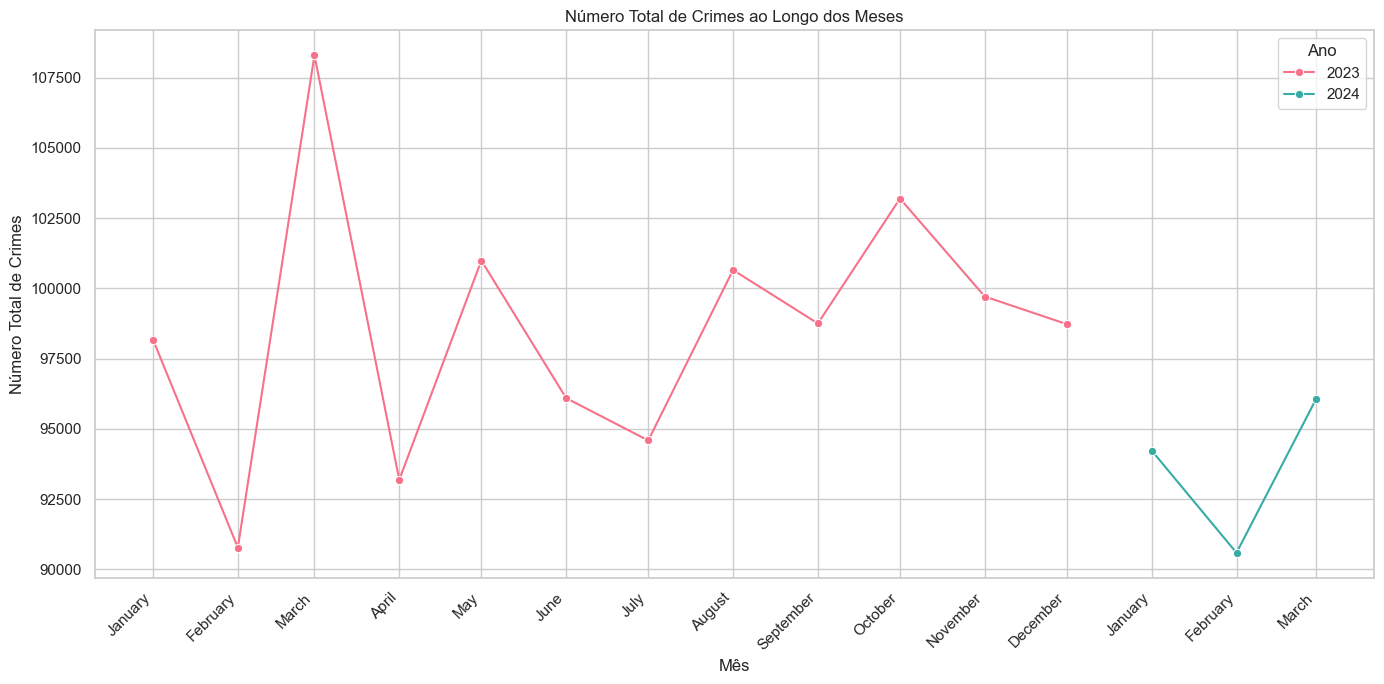

In [246]:
# Agrupa por ano e mês, somando os valores mensais
df_mensal = df_agrupado.groupby(['Ano'])[colunas_mensais].sum().reset_index()

# Derrete os dados para formato longo para facilitar a plotagem
df_melted = df_mensal.melt(id_vars='Ano', var_name='Mes', value_name='Total')


# Mapeia os meses em português para números
meses_map = {
    'Janeiro': '01', 'Fevereiro': '02', 'Marco': '03', 'Abril': '04',
    'Maio': '05', 'Junho': '06', 'Julho': '07', 'Agosto': '08',
    'Setembro': '09', 'Outubro': '10', 'Novembro': '11', 'Dezembro': '12'
}

# Aplica o mapeamento
df_melted['Mes_num'] = df_melted['Mes'].map(meses_map)

# Cria uma coluna de data para facilitar a ordenação e plotagem
df_melted['Data'] = pd.to_datetime(df_melted['Ano'].astype(str) + '-' + df_melted['Mes_num'], format='%Y-%m')

# Filtra os meses em que o total é maior que zero
df_melted = df_melted[df_melted['Total'] > 0]

# Ordena os dados pela coluna de data
df_melted = df_melted.sort_values('Data')

# Define uma paleta de cores personalizada do Seaborn
palette = sns.color_palette("husl", len(df_mensal['Ano'].unique()))

# Plota o número total de crimes ao longo do tempo usando Seaborn com paleta de cores personalizada
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted, x='Data', y='Total', hue='Ano', marker='o', palette=palette)

# Configuração do eixo x para exibir todos os meses
plt.xticks(df_melted['Data'], df_melted['Data'].dt.strftime('%B'), rotation=45, ha='right')

plt.xlabel('Mês')
plt.ylabel('Número Total de Crimes')
plt.title('Número Total de Crimes ao Longo dos Meses')
plt.legend(title='Ano')
plt.grid(True)
plt.tight_layout()
plt.show()


In [247]:
df_mensal

,Ano,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,2023,98177,90774,108297,93184,100992,96094,94586,100654,98751,103197,99710,98726
1,2024,94227,90588,96047,0,0,0,0,0,0,0,0,0


In [248]:
df_melted = df_agrupado.drop("Total",axis=1).melt(id_vars=['Ano', 'Categoria'], var_name='Mês', value_name='Número de Crimes')
df_melted

,Ano,Categoria,Mês,Número de Crimes
0,2023,ESTUPRO,Janeiro,1157
1,2023,FURTO,Janeiro,71930
2,2023,HOMICÍDIO,Janeiro,1112
3,2023,LATROCÍNIO,Janeiro,24
4,2023,ROUBO,Janeiro,23954
...,...,...,...,...
115,2024,ESTUPRO,Dezembro,0
116,2024,FURTO,Dezembro,0
117,2024,HOMICÍDIO,Dezembro,0
118,2024,LATROCÍNIO,Dezembro,0


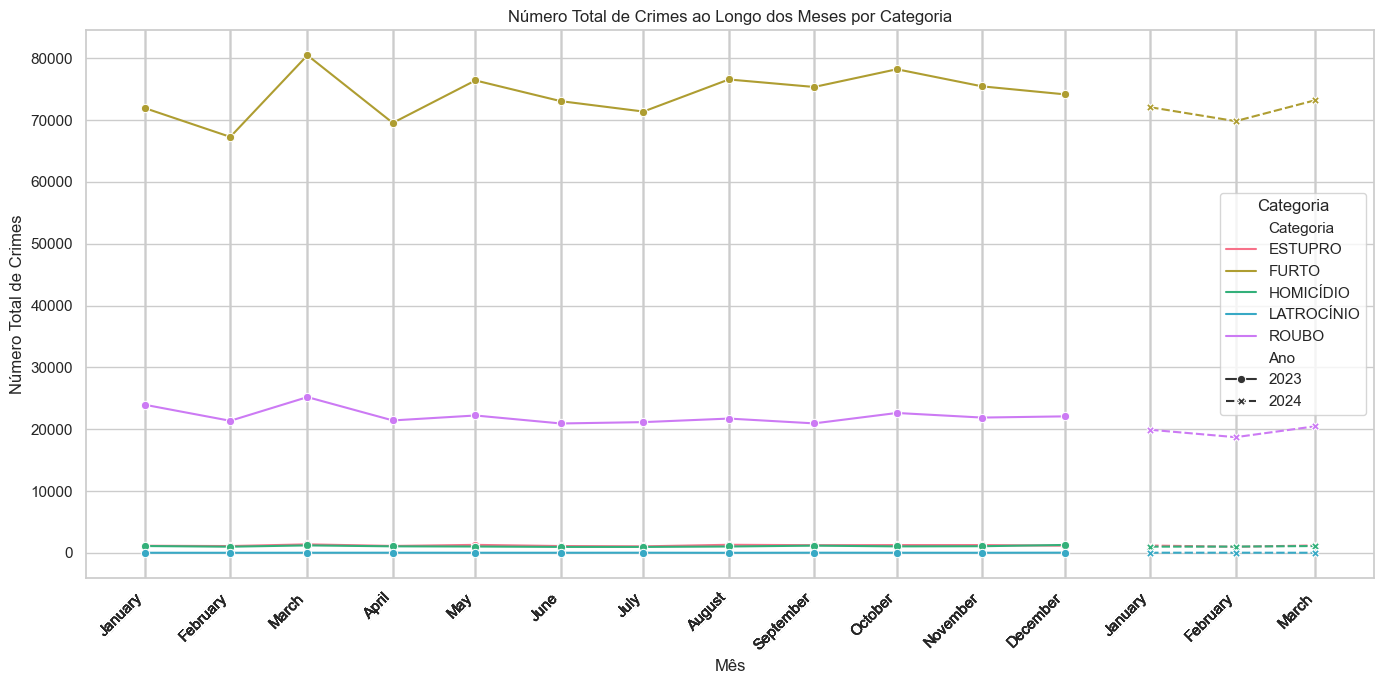

In [249]:
# Agrupa por categoria, ano e mês, somando os valores mensais
df_categoria_ano = df_agrupado.groupby(['Categoria', 'Ano'])[colunas_mensais].sum().reset_index()

# Derrete os dados para formato longo para facilitar a plotagem
df_melted_categoria_ano = df_categoria_ano.melt(id_vars=['Categoria', 'Ano'], var_name='Mes', value_name='Total')

# Mapeia os meses em português para números
df_melted_categoria_ano['Mes_num'] = df_melted_categoria_ano['Mes'].map(meses_map)

# Cria uma coluna de data para facilitar a ordenação e plotagem
df_melted_categoria_ano['Data'] = pd.to_datetime(df_melted_categoria_ano['Ano'].astype(str) + '-' + df_melted_categoria_ano['Mes_num'], format='%Y-%m')

# Filtra os meses em que o total é maior que zero
df_melted_categoria_ano = df_melted_categoria_ano[df_melted_categoria_ano['Total'] > 0]

# Ordena os dados pela coluna de data
df_melted_categoria_ano = df_melted_categoria_ano.sort_values('Data')

# Define uma paleta de cores personalizada do Seaborn para os anos
palette = sns.color_palette("husl", len(df_melted_categoria_ano['Categoria'].unique()))

# Plota o número total de crimes ao longo do tempo por categoria e ano
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted_categoria_ano, x='Data', y='Total', hue='Categoria', style='Ano', markers=True, palette=palette)
plt.xticks(df_melted_categoria_ano['Data'], df_melted_categoria_ano['Data'].dt.strftime('%B'), rotation=45, ha='right')
plt.xlabel('Mês')
plt.ylabel('Número Total de Crimes')
plt.title('Número Total de Crimes ao Longo dos Meses por Categoria')
plt.legend(title='Categoria')
plt.grid(True)
plt.tight_layout()
plt.show()
